In [2]:
from os.path import join

import pandas as pd
from PIL import Image

from nircoloring.config import DATASET_TEMP_IMAGES
from nircoloring.dataset.caltech import fetch_file_from_blob, load_metadata

In [3]:
metadata = load_metadata()

df = pd.DataFrame(data=metadata["images"])
df[~((df["width"] == 800) & (df["height"] == 584))]

seq_num_frames        date_captured  \
0                    1  2013-10-04 13:31:53   
1                    1  2013-11-04 18:37:07   
2                    3  2012-05-09 07:33:45   
3                    3  2012-03-29 02:34:13   
4                    3  2012-05-08 19:23:36   
...                ...                  ...   
243095               1  2014-05-26 15:00:00   
243096               1  2014-01-03 05:00:00   
243097               1  2014-05-05 12:56:30   
243098               1  2013-11-06 22:00:00   
243099               3  2012-02-26 21:16:09   

                                      seq_id  height  width location  \
0       6f2160eb-5567-11e8-990e-dca9047ef277    1494   2048       26   
1       6f27ed66-5567-11e8-9e92-dca9047ef277    1494   2048       26   
2       6f04895c-5567-11e8-a3d6-dca9047ef277    1494   2048       38   
3       6f0385b5-5567-11e8-a80b-dca9047ef277    1494   2048       38   
4       6f0a3ccf-5567-11e8-92fb-dca9047ef277    1494   2048       33   
...                                      ...     ...    ...      ...   
243095  70020d21-5567-11e8-8d88-dca9047ef277    1494   2048      114   
243096  6f945385-5567-11e8-a12a-dca9047ef277    1494   2048       96   
243097  6f9e42a3-5567-11e8-a6c5-dca9047ef277    1494   2048       96   
243098  6f91deeb-5567-11e8-b876-dca9047ef277    1494   2048       96   
243099  6f11fc4a-5567-11e8-b668-dca9047ef277    1494   2048      115   

        rights_holder                                 file_name  \
0       Erin Boydston  5968c0f9-23d2-11e8-a6a3-ec086b02610b.jpg   
1       Erin Boydston  5a0b016f-23d2-11e8-a6a3-ec086b02610b.jpg   
2        Justin Brown  59b93afb-23d2-11e8-a6a3-ec086b02610b.jpg   
3        Justin Brown  59641f56-23d2-11e8-a6a3-ec086b02610b.jpg   
4        Justin Brown  5a1e5306-23d2-11e8-a6a3-ec086b02610b.jpg   
...               ...                                       ...   
243095  Erin Boydston  591b2477-23d2-11e8-a6a3-ec086b02610b.jpg   
243096  Erin Boydston  58f73ebe-23d2-11e8-a6a3-ec086b02610b.jpg   
243097  Erin Boydston  59180827-23d2-11e8-a6a3-ec086b02610b.jpg   
243098  Erin Boydston  59260c8f-23d2-11e8-a6a3-ec086b02610b.jpg   
243099   Justin Brown  58aa5a56-23d2-11e8-a6a3-ec086b02610b.jpg   

                                          id  frame_num  
0       5968c0f9-23d2-11e8-a6a3-ec086b02610b          1  
1       5a0b016f-23d2-11e8-a6a3-ec086b02610b          1  
2       59b93afb-23d2-11e8-a6a3-ec086b02610b          2  
3       59641f56-23d2-11e8-a6a3-ec086b02610b          2  
4       5a1e5306-23d2-11e8-a6a3-ec086b02610b          2  
...                                      ...        ...  
243095  591b2477-23d2-11e8-a6a3-ec086b02610b          1  
243096  58f73ebe-23d2-11e8-a6a3-ec086b02610b          1  
243097  59180827-23d2-11e8-a6a3-ec086b02610b          1  
243098  59260c8f-23d2-11e8-a6a3-ec086b02610b          1  
243099  58aa5a56-23d2-11e8-a6a3-ec086b02610b          3  

[240273 rows x 10 columns]

In [4]:
df.groupby(["location"]).count()

seq_num_frames  date_captured  seq_id  height  width  rights_holder  \
location                                                                        
0                   1784           1784    1784    1784   1784           1784   
1                    248            248     248     248    248            248   
10                   722            722     722     722    722            722   
100                 4752           4752    4752    4752   4752           4752   
101                  254            254     254     254    254            254   
...                  ...            ...     ...     ...    ...            ...   
95                  1668           1668    1668    1668   1668           1668   
96                 37766          37766   37766   37766  37766          37766   
97                    94             94      94      94     94             94   
98                   988            988     988     988    988            988   
99                   149            149     149     149    149            149   

          file_name     id  frame_num  
location                               
0              1784   1784       1784  
1               248    248        248  
10              722    722        722  
100            4752   4752       4752  
101             254    254        254  
...             ...    ...        ...  
95             1668   1668       1668  
96            37766  37766      37766  
97               94     94         94  
98              988    988        988  
99              149    149        149  

[140 rows x 9 columns]

In [5]:
df.groupby(["seq_id"]).count().sort_values(by=["seq_num_frames"], ascending=False)

seq_num_frames  date_captured  height  \
seq_id                                                                        
701ef4d9-5567-11e8-8997-dca9047ef277               5              5       5   
701b1187-5567-11e8-b6aa-dca9047ef277               5              5       5   
701b1e94-5567-11e8-a0b0-dca9047ef277               5              5       5   
701b1e3d-5567-11e8-8fdb-dca9047ef277               5              5       5   
701b1c97-5567-11e8-a528-dca9047ef277               5              5       5   
...                                              ...            ...     ...   
6f799fd9-5567-11e8-8feb-dca9047ef277               1              1       1   
6f79a066-5567-11e8-8529-dca9047ef277               1              1       1   
6f79a0f0-5567-11e8-a25d-dca9047ef277               1              1       1   
6f79a16b-5567-11e8-a720-dca9047ef277               1              1       1   
6f93e187-5567-11e8-bbcc-dca9047ef277               1              1       1   

                                      width  location  rights_holder  \
seq_id                                                                 
701ef4d9-5567-11e8-8997-dca9047ef277      5         5              5   
701b1187-5567-11e8-b6aa-dca9047ef277      5         5              5   
701b1e94-5567-11e8-a0b0-dca9047ef277      5         5              5   
701b1e3d-5567-11e8-8fdb-dca9047ef277      5         5              5   
701b1c97-5567-11e8-a528-dca9047ef277      5         5              5   
...                                     ...       ...            ...   
6f799fd9-5567-11e8-8feb-dca9047ef277      1         1              1   
6f79a066-5567-11e8-8529-dca9047ef277      1         1              1   
6f79a0f0-5567-11e8-a25d-dca9047ef277      1         1              1   
6f79a16b-5567-11e8-a720-dca9047ef277      1         1              1   
6f93e187-5567-11e8-bbcc-dca9047ef277      1         1              1   

                                      file_name  id  frame_num  
seq_id                                                          
701ef4d9-5567-11e8-8997-dca9047ef277          5   5          5  
701b1187-5567-11e8-b6aa-dca9047ef277          5   5          5  
701b1e94-5567-11e8-a0b0-dca9047ef277          5   5          5  
701b1e3d-5567-11e8-8fdb-dca9047ef277          5   5          5  
701b1c97-5567-11e8-a528-dca9047ef277          5   5          5  
...                                         ...  ..        ...  
6f799fd9-5567-11e8-8feb-dca9047ef277          1   1          1  
6f79a066-5567-11e8-8529-dca9047ef277          1   1          1  
6f79a0f0-5567-11e8-a25d-dca9047ef277          1   1          1  
6f79a16b-5567-11e8-a720-dca9047ef277          1   1          1  
6f93e187-5567-11e8-bbcc-dca9047ef277          1   1          1  

[181008 rows x 9 columns]

In [6]:
categories = pd.DataFrame(data=metadata["categories"])
categories = categories.set_index("id")

In [7]:
annotations = pd.DataFrame(data=metadata["annotations"])
annotations.merge(categories["name"], how="left", left_on='category_id', right_index=True)

id  category_id  \
0       207268a3-7d5b-11e7-884d-7845c41c2c67            6   
1       207268a4-7d5b-11e7-884d-7845c41c2c67            1   
2       207268a5-7d5b-11e7-884d-7845c41c2c67           30   
3       207268a6-7d5b-11e7-884d-7845c41c2c67            9   
4       207268a7-7d5b-11e7-884d-7845c41c2c67            3   
...                                      ...          ...   
245113  a8c2537b-7de9-11e7-884d-7845c41c2c67           40   
245114  a8c2537d-7de9-11e7-884d-7845c41c2c67           40   
245115  a8c2537f-7de9-11e7-884d-7845c41c2c67            6   
245116  a8c25381-7de9-11e7-884d-7845c41c2c67           40   
245117  a8c25383-7de9-11e7-884d-7845c41c2c67            3   

                                    image_id           name  
0       58d61304-23d2-11e8-a6a3-ec086b02610b         bobcat  
1       58e59acd-23d2-11e8-a6a3-ec086b02610b        opossum  
2       58a6e5f1-23d2-11e8-a6a3-ec086b02610b          empty  
3       58ff0cef-23d2-11e8-a6a3-ec086b02610b         coyote  
4       588f67b8-23d2-11e8-a6a3-ec086b02610b        raccoon  
...                                      ...            ...  
245113  59293000-23d2-11e8-a6a3-ec086b02610b  mountain_lion  
245114  59136764-23d2-11e8-a6a3-ec086b02610b  mountain_lion  
245115  592de458-23d2-11e8-a6a3-ec086b02610b         bobcat  
245116  58f5b02a-23d2-11e8-a6a3-ec086b02610b  mountain_lion  
245117  5911d80f-23d2-11e8-a6a3-ec086b02610b        raccoon  

[245118 rows x 4 columns]

In [8]:
annotations["has_animal"] = annotations["category_id"] != 30
annotations

id  category_id  \
0       207268a3-7d5b-11e7-884d-7845c41c2c67            6   
1       207268a4-7d5b-11e7-884d-7845c41c2c67            1   
2       207268a5-7d5b-11e7-884d-7845c41c2c67           30   
3       207268a6-7d5b-11e7-884d-7845c41c2c67            9   
4       207268a7-7d5b-11e7-884d-7845c41c2c67            3   
...                                      ...          ...   
245113  a8c2537b-7de9-11e7-884d-7845c41c2c67           40   
245114  a8c2537d-7de9-11e7-884d-7845c41c2c67           40   
245115  a8c2537f-7de9-11e7-884d-7845c41c2c67            6   
245116  a8c25381-7de9-11e7-884d-7845c41c2c67           40   
245117  a8c25383-7de9-11e7-884d-7845c41c2c67            3   

                                    image_id  has_animal  
0       58d61304-23d2-11e8-a6a3-ec086b02610b        True  
1       58e59acd-23d2-11e8-a6a3-ec086b02610b        True  
2       58a6e5f1-23d2-11e8-a6a3-ec086b02610b       False  
3       58ff0cef-23d2-11e8-a6a3-ec086b02610b        True  
4       588f67b8-23d2-11e8-a6a3-ec086b02610b        True  
...                                      ...         ...  
245113  59293000-23d2-11e8-a6a3-ec086b02610b        True  
245114  59136764-23d2-11e8-a6a3-ec086b02610b        True  
245115  592de458-23d2-11e8-a6a3-ec086b02610b        True  
245116  58f5b02a-23d2-11e8-a6a3-ec086b02610b        True  
245117  5911d80f-23d2-11e8-a6a3-ec086b02610b        True  

[245118 rows x 4 columns]

In [9]:
animal_occurrences = annotations.groupby("image_id")["has_animal"].any()
animal_occurrences

image_id
5858bf1e-23d2-11e8-a6a3-ec086b02610b    False
5858bf20-23d2-11e8-a6a3-ec086b02610b    False
5858bf21-23d2-11e8-a6a3-ec086b02610b     True
5858bf22-23d2-11e8-a6a3-ec086b02610b    False
5858bf23-23d2-11e8-a6a3-ec086b02610b    False
                                        ...  
5a2e14d3-23d2-11e8-a6a3-ec086b02610b     True
5a2e14d4-23d2-11e8-a6a3-ec086b02610b     True
5a2e14d5-23d2-11e8-a6a3-ec086b02610b     True
5a2e14d6-23d2-11e8-a6a3-ec086b02610b     True
5a2e14d8-23d2-11e8-a6a3-ec086b02610b     True
Name: has_animal, Length: 243100, dtype: bool

In [10]:
df = df.merge(animal_occurrences, how="left", left_on="id", right_on="image_id")
df

seq_num_frames        date_captured  \
0                    1  2013-10-04 13:31:53   
1                    1  2013-11-04 18:37:07   
2                    3  2012-05-09 07:33:45   
3                    3  2012-03-29 02:34:13   
4                    3  2012-05-08 19:23:36   
...                ...                  ...   
243095               1  2014-05-26 15:00:00   
243096               1  2014-01-03 05:00:00   
243097               1  2014-05-05 12:56:30   
243098               1  2013-11-06 22:00:00   
243099               3  2012-02-26 21:16:09   

                                      seq_id  height  width location  \
0       6f2160eb-5567-11e8-990e-dca9047ef277    1494   2048       26   
1       6f27ed66-5567-11e8-9e92-dca9047ef277    1494   2048       26   
2       6f04895c-5567-11e8-a3d6-dca9047ef277    1494   2048       38   
3       6f0385b5-5567-11e8-a80b-dca9047ef277    1494   2048       38   
4       6f0a3ccf-5567-11e8-92fb-dca9047ef277    1494   2048       33   
...                                      ...     ...    ...      ...   
243095  70020d21-5567-11e8-8d88-dca9047ef277    1494   2048      114   
243096  6f945385-5567-11e8-a12a-dca9047ef277    1494   2048       96   
243097  6f9e42a3-5567-11e8-a6c5-dca9047ef277    1494   2048       96   
243098  6f91deeb-5567-11e8-b876-dca9047ef277    1494   2048       96   
243099  6f11fc4a-5567-11e8-b668-dca9047ef277    1494   2048      115   

        rights_holder                                 file_name  \
0       Erin Boydston  5968c0f9-23d2-11e8-a6a3-ec086b02610b.jpg   
1       Erin Boydston  5a0b016f-23d2-11e8-a6a3-ec086b02610b.jpg   
2        Justin Brown  59b93afb-23d2-11e8-a6a3-ec086b02610b.jpg   
3        Justin Brown  59641f56-23d2-11e8-a6a3-ec086b02610b.jpg   
4        Justin Brown  5a1e5306-23d2-11e8-a6a3-ec086b02610b.jpg   
...               ...                                       ...   
243095  Erin Boydston  591b2477-23d2-11e8-a6a3-ec086b02610b.jpg   
243096  Erin Boydston  58f73ebe-23d2-11e8-a6a3-ec086b02610b.jpg   
243097  Erin Boydston  59180827-23d2-11e8-a6a3-ec086b02610b.jpg   
243098  Erin Boydston  59260c8f-23d2-11e8-a6a3-ec086b02610b.jpg   
243099   Justin Brown  58aa5a56-23d2-11e8-a6a3-ec086b02610b.jpg   

                                          id  frame_num  has_animal  
0       5968c0f9-23d2-11e8-a6a3-ec086b02610b          1       False  
1       5a0b016f-23d2-11e8-a6a3-ec086b02610b          1        True  
2       59b93afb-23d2-11e8-a6a3-ec086b02610b          2        True  
3       59641f56-23d2-11e8-a6a3-ec086b02610b          2        True  
4       5a1e5306-23d2-11e8-a6a3-ec086b02610b          2       False  
...                                      ...        ...         ...  
243095  591b2477-23d2-11e8-a6a3-ec086b02610b          1       False  
243096  58f73ebe-23d2-11e8-a6a3-ec086b02610b          1       False  
243097  59180827-23d2-11e8-a6a3-ec086b02610b          1       False  
243098  59260c8f-23d2-11e8-a6a3-ec086b02610b          1       False  
243099  58aa5a56-23d2-11e8-a6a3-ec086b02610b          3        True  

[243100 rows x 11 columns]

In [11]:
df = df[df["has_animal"]]
df

seq_num_frames        date_captured  \
1                    1  2013-11-04 18:37:07   
2                    3  2012-05-09 07:33:45   
3                    3  2012-03-29 02:34:13   
5                    1  2012-01-06 10:57:00   
6                    3  2014-06-27 08:29:02   
...                ...                  ...   
243088               3  2012-01-16 10:23:21   
243091               1  2013-11-24 01:00:28   
243093               3  2011-04-28 23:28:30   
243094               3  2012-02-28 12:38:32   
243099               3  2012-02-26 21:16:09   

                                      seq_id  height  width location  \
1       6f27ed66-5567-11e8-9e92-dca9047ef277    1494   2048       26   
2       6f04895c-5567-11e8-a3d6-dca9047ef277    1494   2048       38   
3       6f0385b5-5567-11e8-a80b-dca9047ef277    1494   2048       38   
5       70096335-5567-11e8-a99a-dca9047ef277    1536   2048       36   
6       7013c982-5567-11e8-be89-dca9047ef277    1494   2048       61   
...                                      ...     ...    ...      ...   
243088  6efdd223-5567-11e8-b834-dca9047ef277    1494   2048       75   
243091  6f53c29c-5567-11e8-a351-dca9047ef277    1494   2048       76   
243093  6f0e46a3-5567-11e8-9439-dca9047ef277    1494   2048      112   
243094  6f1478ba-5567-11e8-a7f8-dca9047ef277    1494   2048       88   
243099  6f11fc4a-5567-11e8-b668-dca9047ef277    1494   2048      115   

        rights_holder                                 file_name  \
1       Erin Boydston  5a0b016f-23d2-11e8-a6a3-ec086b02610b.jpg   
2        Justin Brown  59b93afb-23d2-11e8-a6a3-ec086b02610b.jpg   
3        Justin Brown  59641f56-23d2-11e8-a6a3-ec086b02610b.jpg   
5       Erin Boydston  5a096955-23d2-11e8-a6a3-ec086b02610b.jpg   
6        Justin Brown  59b93a3b-23d2-11e8-a6a3-ec086b02610b.jpg   
...               ...                                       ...   
243088   Justin Brown  58e0f6cf-23d2-11e8-a6a3-ec086b02610b.jpg   
243091  Erin Boydston  58b66766-23d2-11e8-a6a3-ec086b02610b.jpg   
243093   Justin Brown  58e28139-23d2-11e8-a6a3-ec086b02610b.jpg   
243094   Justin Brown  58d7a2ab-23d2-11e8-a6a3-ec086b02610b.jpg   
243099   Justin Brown  58aa5a56-23d2-11e8-a6a3-ec086b02610b.jpg   

                                          id  frame_num  has_animal  
1       5a0b016f-23d2-11e8-a6a3-ec086b02610b          1        True  
2       59b93afb-23d2-11e8-a6a3-ec086b02610b          2        True  
3       59641f56-23d2-11e8-a6a3-ec086b02610b          2        True  
5       5a096955-23d2-11e8-a6a3-ec086b02610b          1        True  
6       59b93a3b-23d2-11e8-a6a3-ec086b02610b          2        True  
...                                      ...        ...         ...  
243088  58e0f6cf-23d2-11e8-a6a3-ec086b02610b          3        True  
243091  58b66766-23d2-11e8-a6a3-ec086b02610b          1        True  
243093  58e28139-23d2-11e8-a6a3-ec086b02610b          1        True  
243094  58d7a2ab-23d2-11e8-a6a3-ec086b02610b          2        True  
243099  58aa5a56-23d2-11e8-a6a3-ec086b02610b          3        True  

[117355 rows x 11 columns]

In [12]:
df.groupby("has_animal").size()

has_animal
True    117355
dtype: int64

In [13]:
location_occurrences = df.groupby(["location"]).size()
weights = 1 / location_occurrences.rename("weight")
df = df.merge(weights, how="left", on="location")
df.head()

seq_num_frames        date_captured                                seq_id  \
0               1  2013-11-04 18:37:07  6f27ed66-5567-11e8-9e92-dca9047ef277   
1               3  2012-05-09 07:33:45  6f04895c-5567-11e8-a3d6-dca9047ef277   
2               3  2012-03-29 02:34:13  6f0385b5-5567-11e8-a80b-dca9047ef277   
3               1  2012-01-06 10:57:00  70096335-5567-11e8-a99a-dca9047ef277   
4               3  2014-06-27 08:29:02  7013c982-5567-11e8-be89-dca9047ef277   

   height  width location  rights_holder  \
0    1494   2048       26  Erin Boydston   
1    1494   2048       38   Justin Brown   
2    1494   2048       38   Justin Brown   
3    1536   2048       36  Erin Boydston   
4    1494   2048       61   Justin Brown   

                                  file_name  \
0  5a0b016f-23d2-11e8-a6a3-ec086b02610b.jpg   
1  59b93afb-23d2-11e8-a6a3-ec086b02610b.jpg   
2  59641f56-23d2-11e8-a6a3-ec086b02610b.jpg   
3  5a096955-23d2-11e8-a6a3-ec086b02610b.jpg   
4  59b93a3b-23d2-11e8-a6a3-ec086b02610b.jpg   

                                     id  frame_num  has_animal    weight  
0  5a0b016f-23d2-11e8-a6a3-ec086b02610b          1        True  0.001475  
1  59b93afb-23d2-11e8-a6a3-ec086b02610b          2        True  0.000105  
2  59641f56-23d2-11e8-a6a3-ec086b02610b          2        True  0.000105  
3  5a096955-23d2-11e8-a6a3-ec086b02610b          1        True  0.000823  
4  59b93a3b-23d2-11e8-a6a3-ec086b02610b          2        True  0.000456

<AxesSubplot:ylabel='Frequency'>

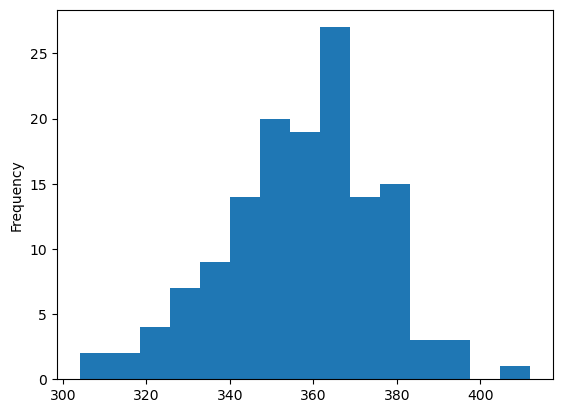

In [14]:
df.sample(50000, weights="weight", replace=True).groupby("location").size().plot.hist(bins=15)

<AxesSubplot:ylabel='Frequency'>

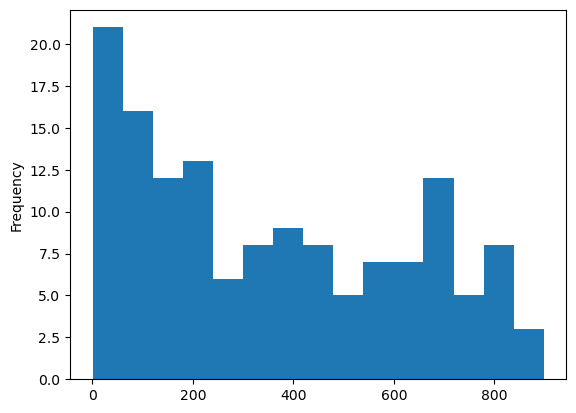

In [15]:
df.sample(50000, weights="weight", replace=False).groupby("location").size().plot.hist(bins=15)

In [16]:
df.groupby("location").size()

location
0      1741
1       238
10      678
100    4573
101     240
       ... 
95     1501
96     1078
97       86
98      918
99      138
Length: 140, dtype: int64

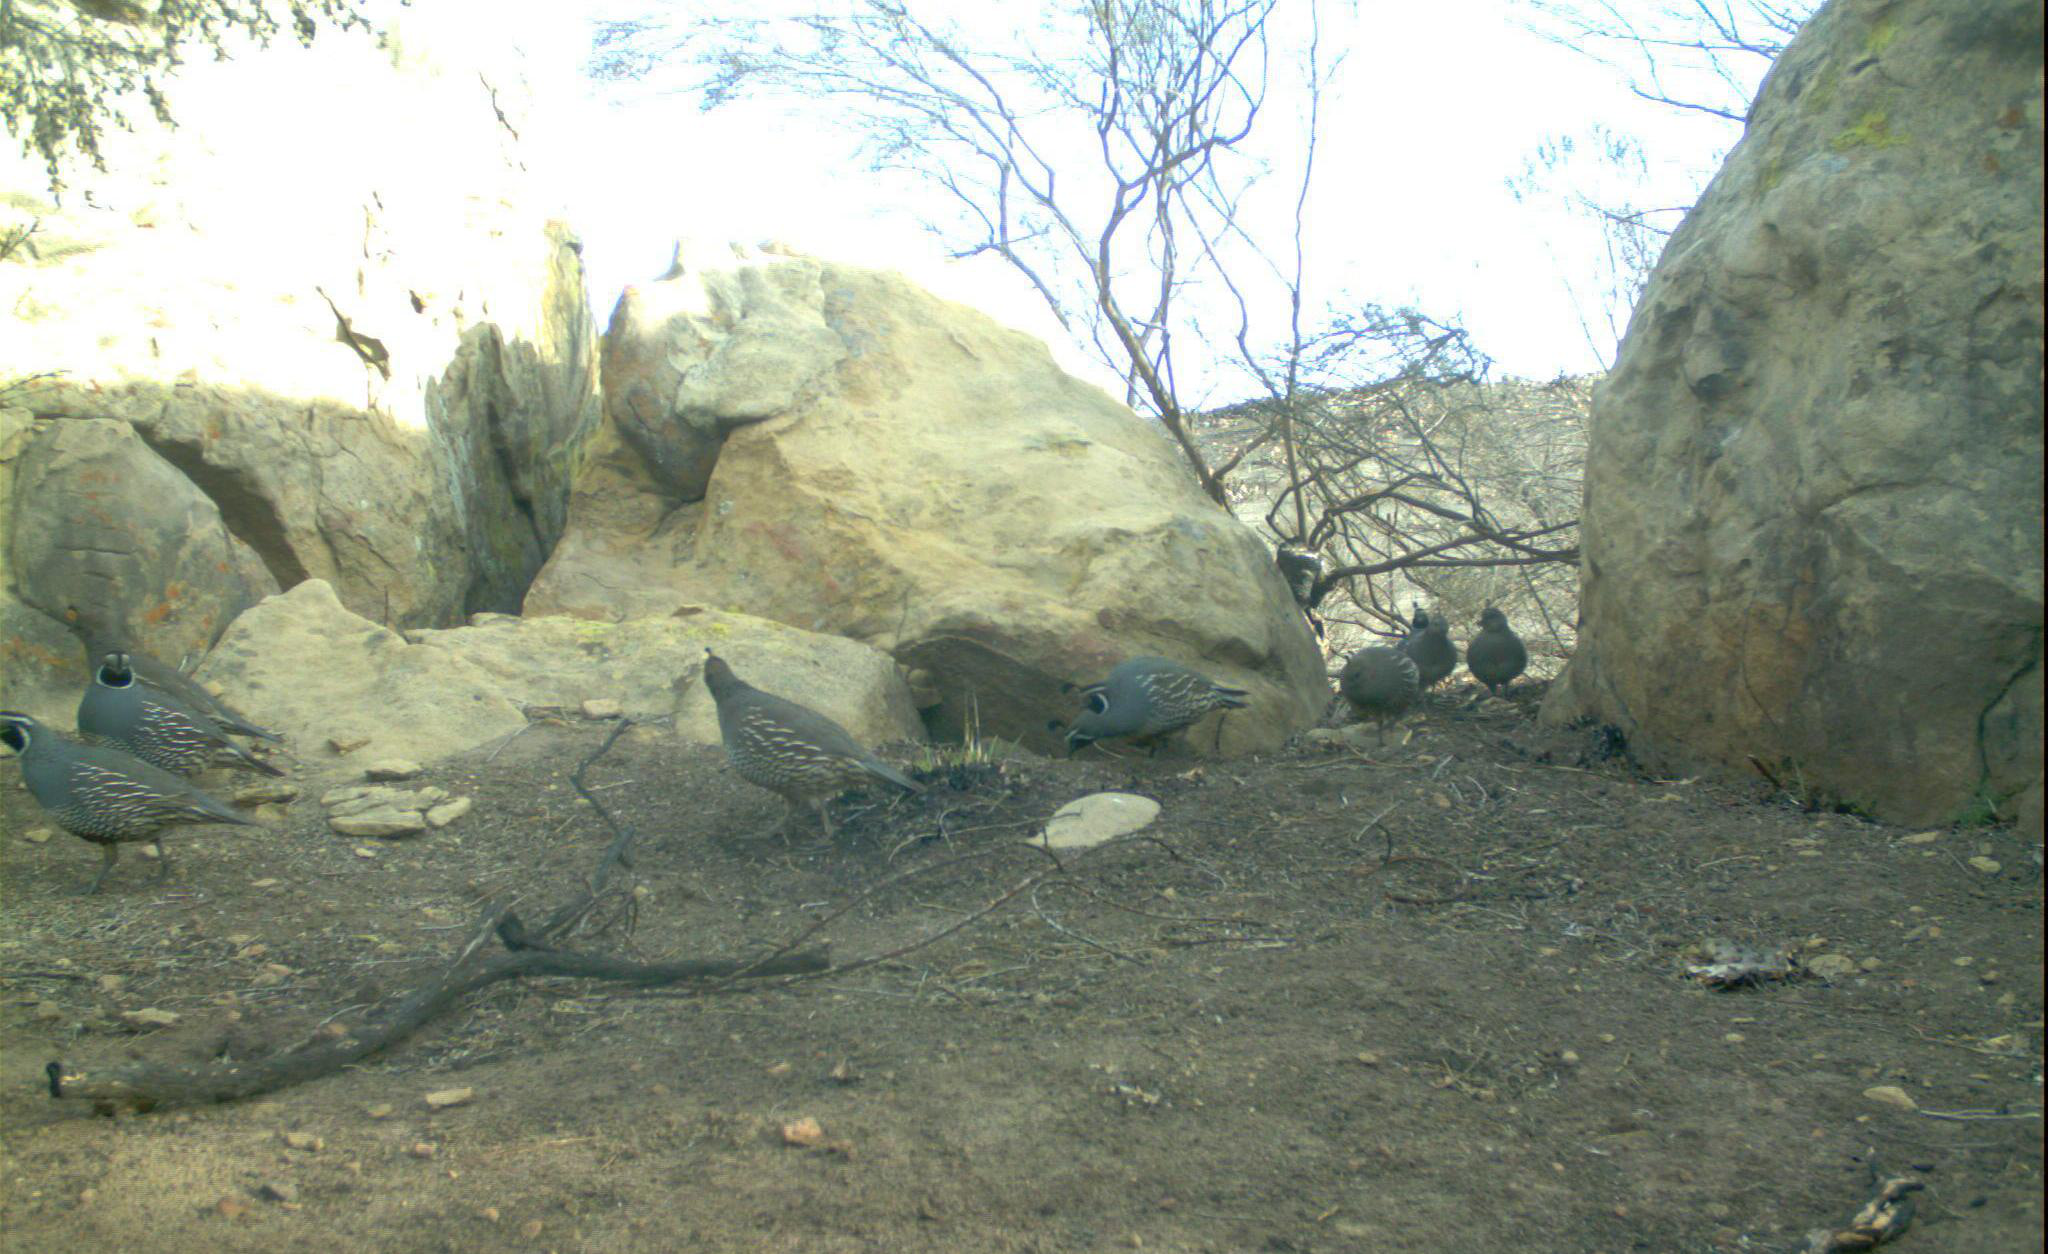

In [17]:
filename = "598f7588-23d2-11e8-a6a3-ec086b02610b.jpg"
target_file = join(DATASET_TEMP_IMAGES, filename)
await fetch_file_from_blob(filename, target_file)
image = Image.open(target_file)
display(image)

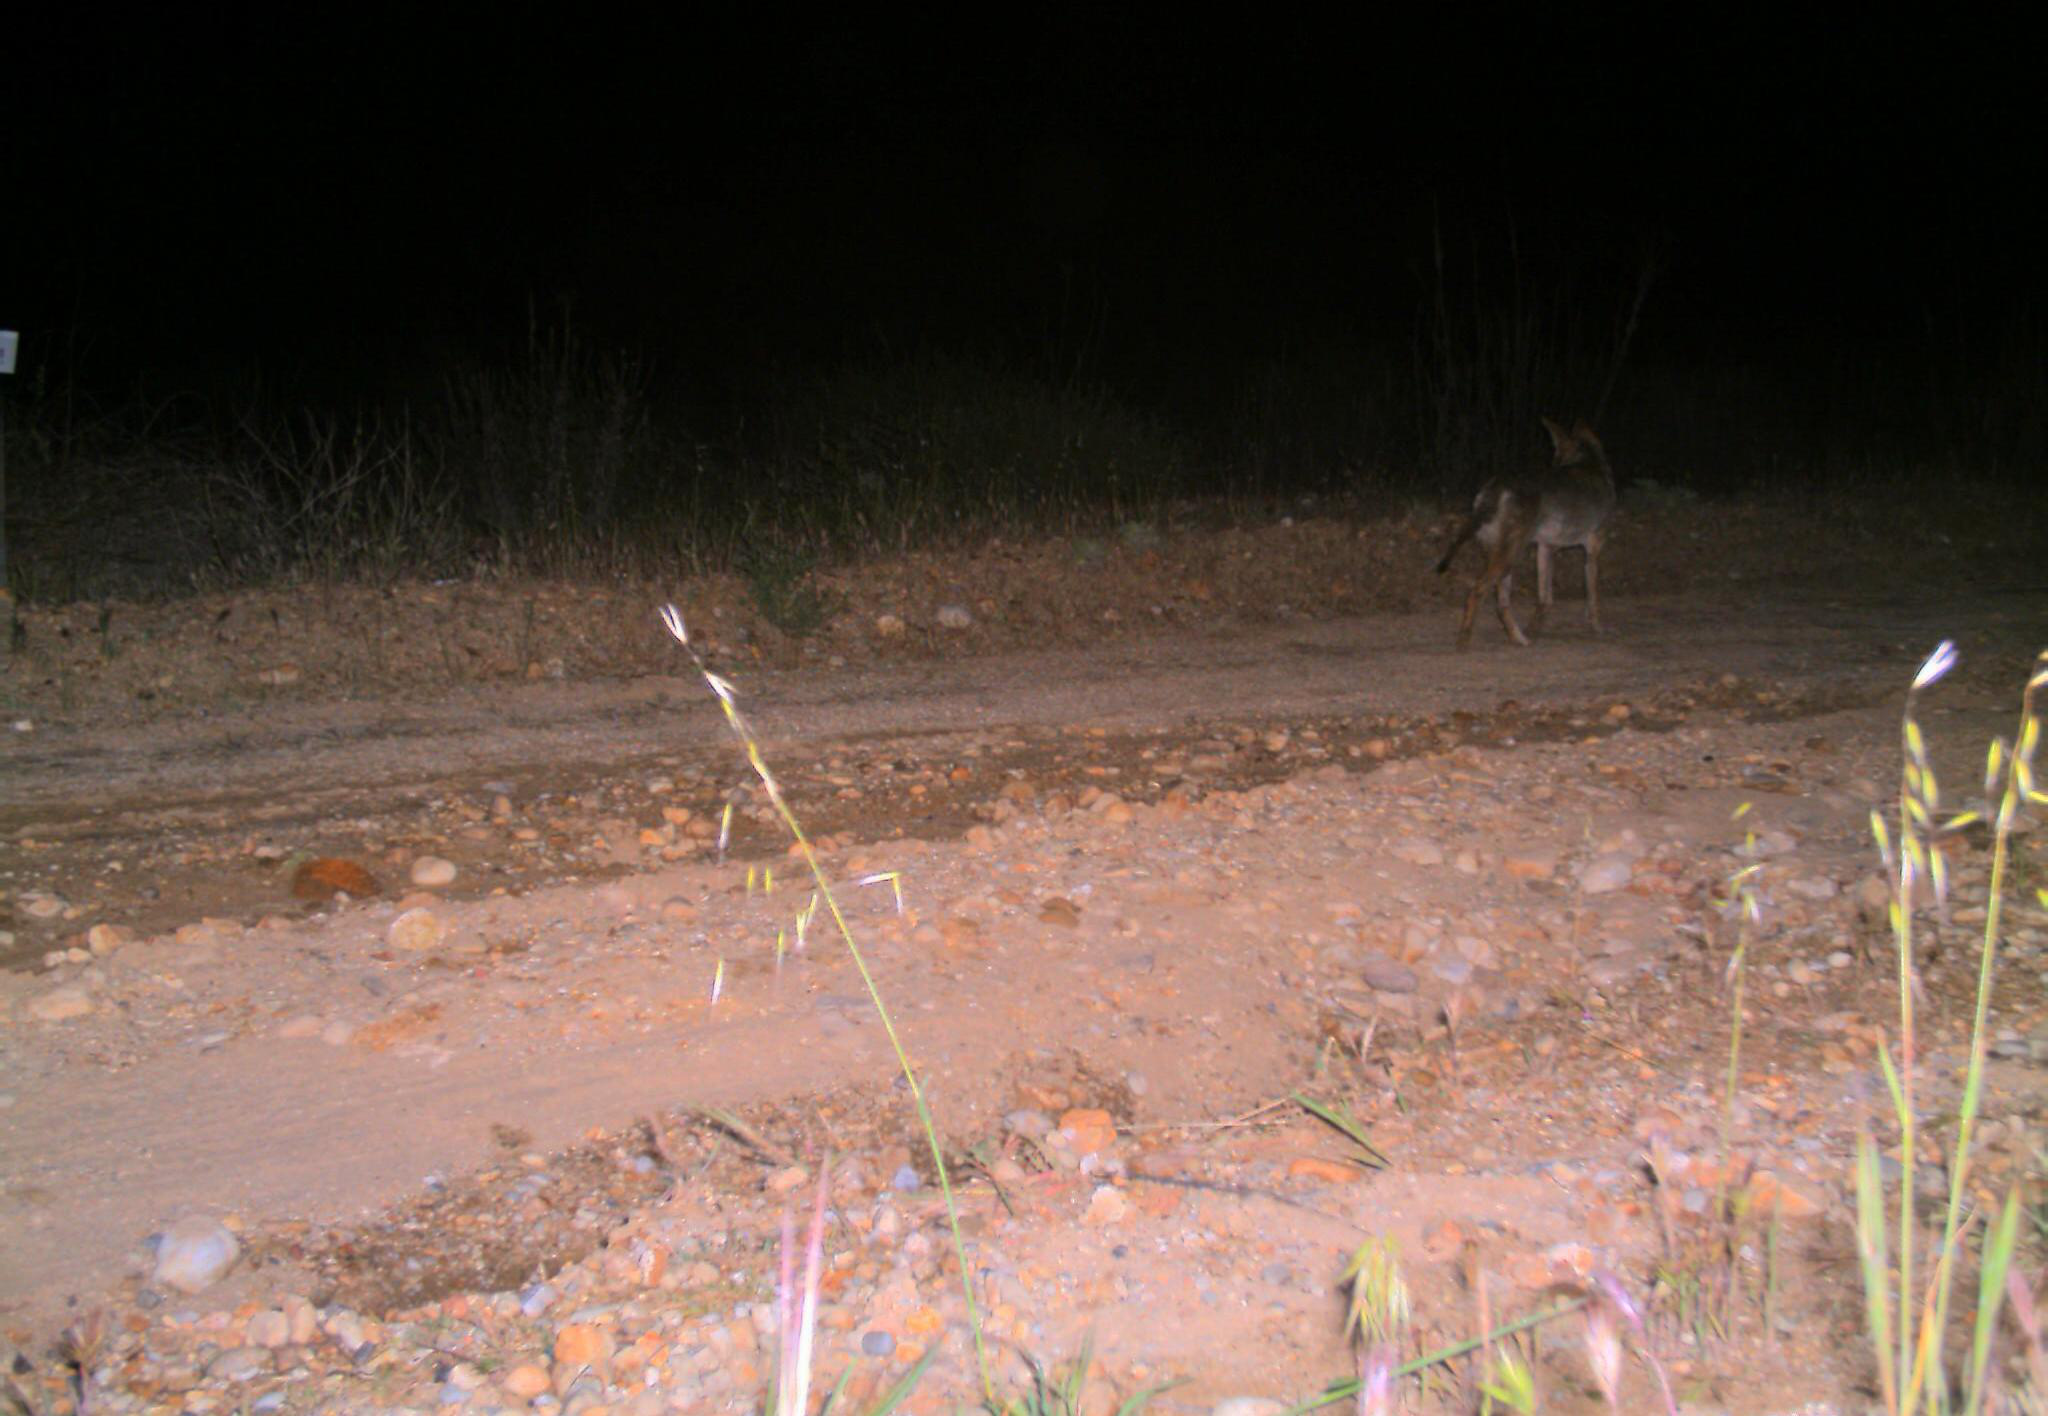

In [18]:
filename = "5a0b021c-23d2-11e8-a6a3-ec086b02610b.jpg"
target_file = join(DATASET_TEMP_IMAGES, filename)
await fetch_file_from_blob(filename, target_file)
image = Image.open(target_file)
display(image)

In [21]:
from astral import LocationInfo
from nircoloring.dataset.caltech import SOUTH_WEST_US_SUNSET_LATEST_LAT, SOUTH_WEST_US_SUNRISE_EARLIEST_LNG, \
    SOUTH_WEST_US_SUNRISE_EARLIEST_LAT, is_in_night, SOUTH_WEST_US_SUNSET_LATEST_LNG


southWestUsSunset = LocationInfo("South West US", "US", "US/Pacific", SOUTH_WEST_US_SUNSET_LATEST_LAT,
                                 SOUTH_WEST_US_SUNSET_LATEST_LNG)
southWestUsSunrise = LocationInfo("South West US", "US", "US/Pacific", SOUTH_WEST_US_SUNRISE_EARLIEST_LAT,
                                  SOUTH_WEST_US_SUNRISE_EARLIEST_LNG)

df["date_captured"] = pd.to_datetime(df["date_captured"], errors="coerce").dt.tz_localize(southWestUsSunrise.timezone,
                                                                                          ambiguous="NaT",
                                                                                          nonexistent="NaT")
df.dropna(subset=["date_captured"], inplace=True)

In [36]:
cur = df[df.file_name == "58a6e948-23d2-11e8-a6a3-ec086b02610b.jpg"]

display(cur)

is_in_night(list(cur.date_captured)[0], southWestUsSunrise, southWestUsSunset)

seq_num_frames             date_captured  \
87648               3 2014-12-05 17:06:00-08:00   

                                     seq_id  height  width location  \
87648  701a614a-5567-11e8-8db6-dca9047ef277    1494   2048       82   

      rights_holder                                 file_name  \
87648  Justin Brown  58b4a9c3-23d2-11e8-a6a3-ec086b02610b.jpg   

                                         id  frame_num  has_animal    weight  
87648  58b4a9c3-23d2-11e8-a6a3-ec086b02610b          3        True  0.002732

True